In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Q1.

### Part1. Plot the above solution between 0 ≤ t ≤ 30

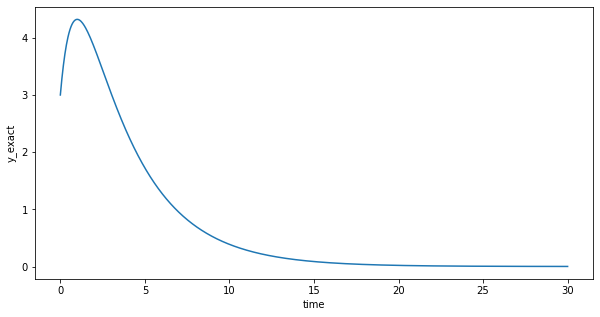

In [2]:
t1000 = np.linspace(0, 30, 1000)
y_exact = (70/9)*np.exp(-0.3 * t1000) - (43/9)*np.exp(-1.2 * t1000)

plt.figure(figsize = (10,5))
plt.xlabel("time"); plt.ylabel("y_exact")
plt.plot(t1000,y_exact)

In [3]:
def euler(t, y0):
    h = t[1] - t[0]
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h * (-1.2 * y[i-1] + 7*np.exp(-0.3 * t[i-1]))
    return y

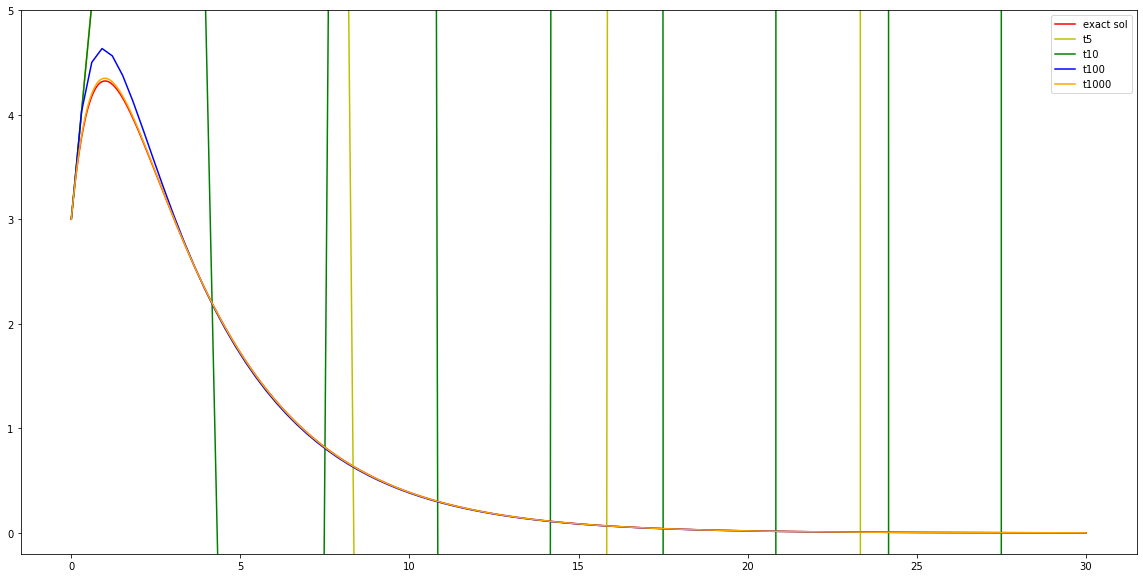

In [4]:
t5 = np.linspace(0,30,5)
t10 = np.linspace(0,30,10)
t100 = np.linspace(0,30,100)
t1000 = np.linspace(0,30,1000)


y5 = euler(t5, 3)
y10 = euler(t10, 3)
y100 = euler(t100, 3)
y1000 = euler(t1000, 3)

y_exact = (70/9)*np.exp(-0.3 * t1000) - (43/9)*np.exp(-1.2 * t1000)

plt.figure(figsize = (20,10))
plt.ylim(-0.2, 5)
plt.plot(t1000, y_exact, label = "exact sol", c = 'r')
plt.plot(t5, y5, label = "t5", c = 'y');plt.plot(t10, y10, label = 't10', c = 'g')
plt.plot(t100, y100, label = 't100', c = 'b');plt.plot(t1000, y1000, label = 't1000', c = 'orange')
plt.legend()

- Looking at the plot, we can conclude that t5 and t10 is not even close to exact solution, and we can see that larger the number of len(t), it gets closer as t1000is very close to exact solution

# Q2. Use ode45/odeint/ivp solve for this problem. Consider the equation of the pendulum as derived in the first class:
### Part1. Write the above second order ODE as a system of two first order ODEs. Clearly specify the resulting initial conditions as well.


- substituting d(theta)/dt = w, it becomes
- d(theta)/dt = w ; theta(0) = A
- dw/dt = -g/L * np.sin(theta) ; w(0) = B

### Part2. Consider the initial conditions A = π/100, B = 0 and length of the pendulum L = g/(2π)2 meters. For these parameters plot the solution θ(t) for 0 ≤ t ≤ 2. For such a small initial angle, it is possible that the differential equation can be linearized as we did in the first class. In this case the solution may be approximated by θ(t) = A cos(pg/Lt). Plot this linearized solution on the same plot and for the same time period. Is there a good match?

In [5]:
def pend(y, t, c):
    theta, omega = y
    dydt = [omega, c*np.sin(theta)]
    return dydt

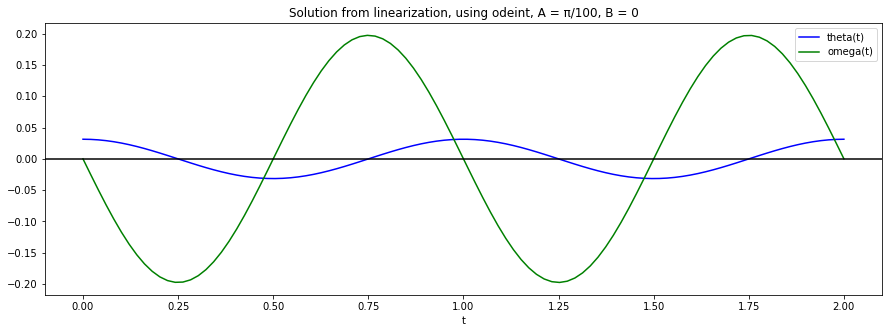

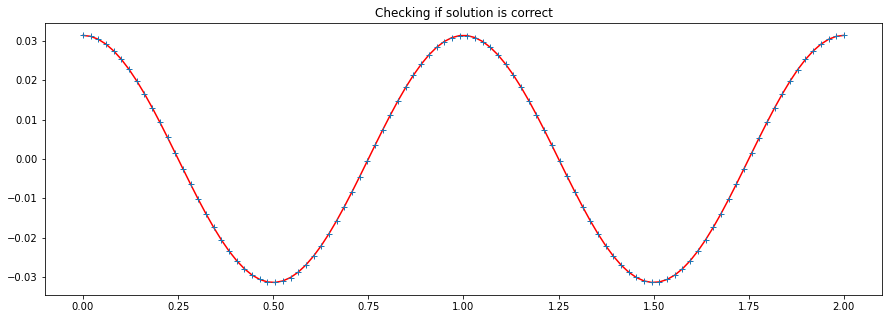

In [6]:
A = np.pi / 100
B = 0
g = 9.81
L = g / ((2*np.pi)**2)

t = np.linspace(0,2,100)

c = - g/L
y0 = [A, B]
sol = odeint(pend, y0, t, args = tuple([c]))

plt.figure(figsize = (15, 5))
plt.title("Solution from linearization, using odeint, A = π/100, B = 0")
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.axhline(0, c = 'black')
plt.show()

plt.figure(figsize = (15, 5))
plt.title("Checking if solution is correct")
plt.plot(t, A*np.cos((g/L)**(1/2) * t), c = 'r', label = "exact solution")
plt.plot(t, sol[:, 0], "+", label='linearized solution')
plt.show()

In [7]:
error1 = np.linalg.norm(sol[:, 0] - A*np.cos((g/L)**(1/2) * t))
print("Magnitude of error :", error1)

Magnitude of error : 9.841338366965974e-05


- There is a good match
- Checking the solution, ode can be linearized in a small initial angle A = π/100

### Part 3. Consider the initial conditions A = π/10,B = 0 and length of the pendulum L = g/(2π)2 meters. For these parameters plot the solution θ(t) for 0 ≤ t ≤ 2. Can you say whether the linearized formulation still applies to this case or not?

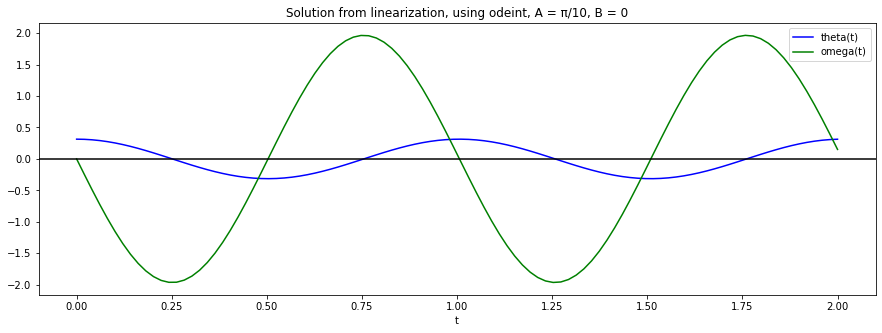

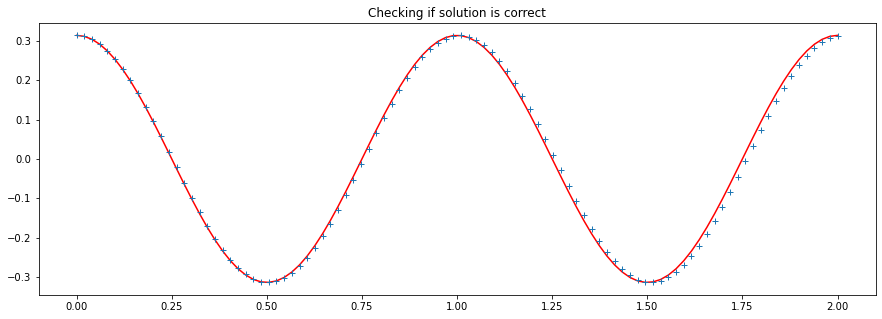

In [8]:
A = np.pi / 10
B = 0
g = 9.81
L = g / ((2*np.pi)**2)

t = np.linspace(0,2,100)

c = - g/L
y0 = [A, B]
sol = odeint(pend, y0, t, args = tuple([c]))

plt.figure(figsize = (15, 5))
plt.title("Solution from linearization, using odeint, A = π/10, B = 0")
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.axhline(0, c = 'black')
plt.show()

plt.figure(figsize = (15, 5))
plt.title("Checking if solution is correct")
plt.plot(t, A*np.cos((g/L)**(1/2) * t), c = 'r', label = "exact solution")
plt.plot(t, sol[:, 0], "+", label='linearized solution')
plt.show()

In [9]:
error2 = np.linalg.norm(sol[:, 0] - A*np.cos((g/L)**(1/2) * t))
print("Magnitude of error :", error2)
print("Difference from error when A = π/100 :", abs(error1 - error2))

Magnitude of error : 0.09875971333594517
Difference from error when A = π/100 : 0.09866129995227552


- It has a bit more error, but it is still good enough.

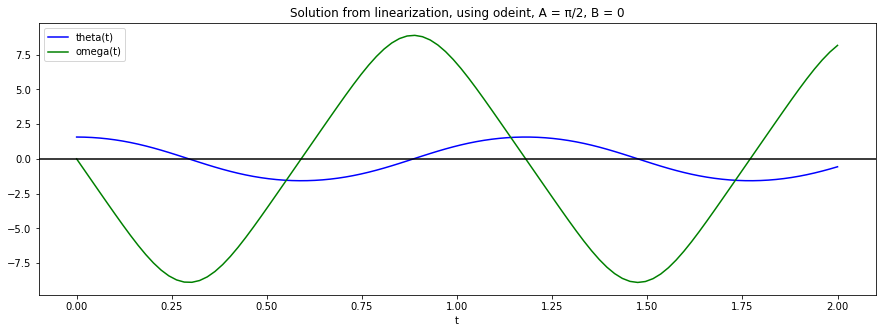

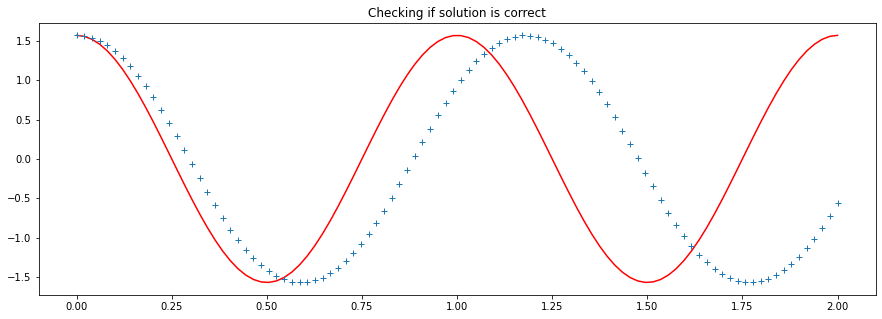

In [10]:
A = np.pi / 2
B = 0
g = 9.81
L = g / ((2*np.pi)**2)

t = np.linspace(0,2,100)

c = - g/L
y0 = [A, B]
sol = odeint(pend, y0, t, args = tuple([c]))

plt.figure(figsize = (15, 5))
plt.title("Solution from linearization, using odeint, A = π/2, B = 0")
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.axhline(0, c = 'black')
plt.show()

plt.figure(figsize = (15, 5))
plt.title("Checking if solution is correct")
plt.plot(t, A*np.cos((g/L)**(1/2) * t), c = 'r', label = "exact solution")
plt.plot(t, sol[:, 0], "+", label='linearized solution')
plt.show()

In [11]:
error3 = np.linalg.norm(sol[:, 0] - A*np.cos((g/L)**(1/2) * t))
print("Magnitude of error :", error3)
print("Difference from error when A = π/100 :", abs(error1 - error3))

Magnitude of error : 11.949994577282862
Difference from error when A = π/100 : 11.949896163899192


- It is not good enough anymore.
- I would say linearized formulation can't be applied to this case.

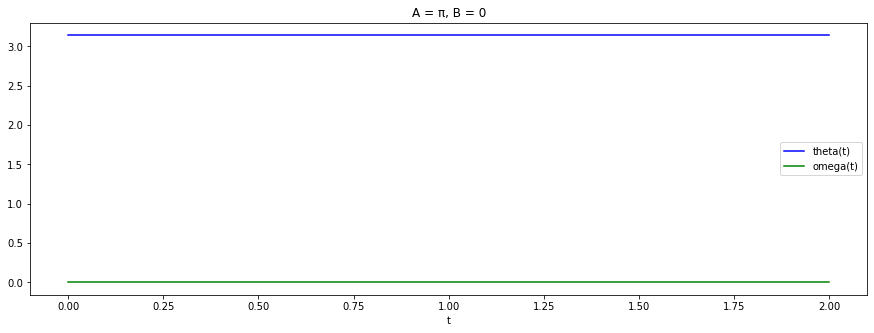

In [12]:
A = np.pi
B = 0
g = 9.81
L = g / ((2*np.pi)**2)

t = np.linspace(0,2,100)

c = - g/L
y0 = [A, B]
sol = odeint(pend, y0, t, args = tuple([c]))

plt.figure(figsize = (15, 5))
plt.title("A = π, B = 0")
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

- if A = π, it means that the gravity won't swing the pendulum, it will make it drop vertically.
- So, the angle theta will remain at π.

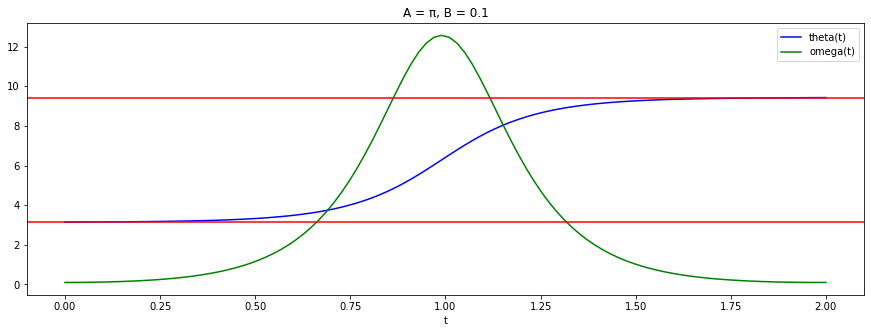

In [13]:
A = np.pi
B = 0.1
g = 9.81
L = g / ((2*np.pi)**2)

t = np.linspace(0,2,100)

c = - g/L
y0 = [A, B]
sol = odeint(pend, y0, t, args = tuple([c]))

plt.figure(figsize = (15, 5))
plt.title("A = π, B = 0.1")
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.axhline(3*np.pi, c = 'r')
plt.axhline(np.pi, c = 'r')
plt.show()

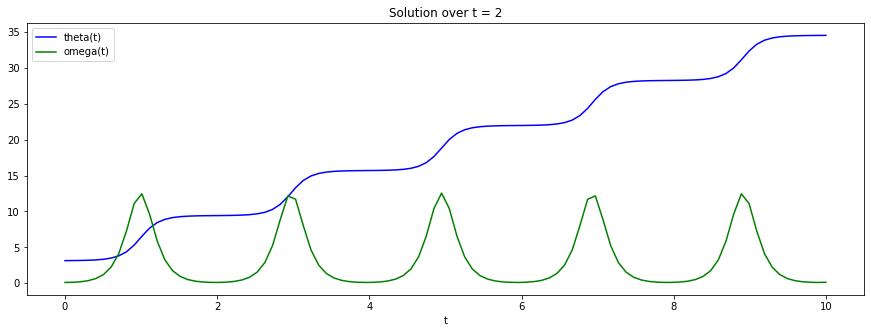

In [14]:
A = np.pi
B = 0.1
g = 9.81
L = g / ((2*np.pi)**2)

t = np.linspace(0,10,100)

c = - g/L
y0 = [A, B]
sol = odeint(pend, y0, t, args = tuple([c]))

plt.figure(figsize = (15, 5))
plt.title("Solution over t = 2")
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

- In this result, theta starts from π and keeps increasing until 3π.
- Checking times after 2 seconds, we can see the angle keeps increasing like a sort of step function.
- Thus, we can conclude that pendulum has motion of full circle now.